# Sampling in Python
Run the hidden code cell below to import the data used in this course.

In [8]:
# Importing pandas
import pandas as pd

# Importing the course arrays
attrition_pop = pd.read_feather("datasets/attrition.feather")
spotify_population = pd.read_feather("datasets/spotify_2000_2020.feather")
coffee = pd.read_feather("datasets/coffee_ratings_full.feather")


In [2]:
#Importing libraries 

import numpy as np 
import random 
import matplotlib.pyplot as plt 

## Chapter 1

### Sampling with pandas

In [9]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness  ...    year
34715       0.00589  ...  2013.0
35427       0.13200  ...  2020.0
39712       0.00436  ...  2001.0
35289       0.28900  ...  2019.0
36244       0.67500  ...  2007.0
...             ...  ...     ...
535         0.63800  ...  2005.0
2076        0.04810  ...  2020.0
7621        0.08950  ...  2013.0
34288       0.98100  ...  2009.0
2693        0.27700  ...  2005.0

[1000 rows x 20 columns]
3.8521519140900073
3.9163935666666667


### Simple sampling

In [8]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-6.39649


### Are findings from the sample generalizable?

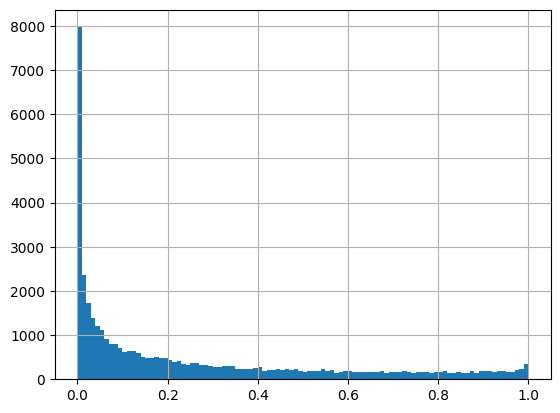

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0,1.01, 0.01))
plt.show()


### Generating random numbers

[ 1.103539    1.11807672 -2.46529786 ... -0.98703723 -1.61555196
  2.3243823 ]


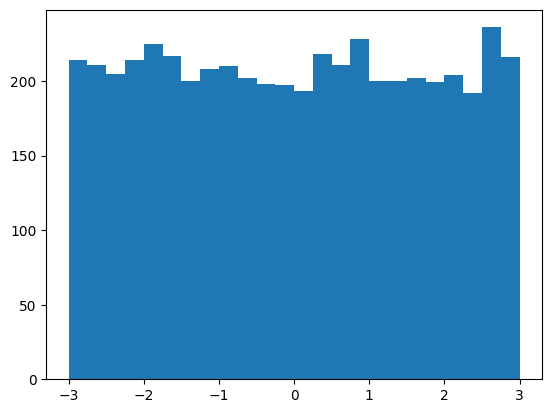

In [10]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print uniforms
print(uniforms)

# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

[6.31858047 5.93771537 4.18910342 ... 3.17805837 5.16598237 4.50416337]


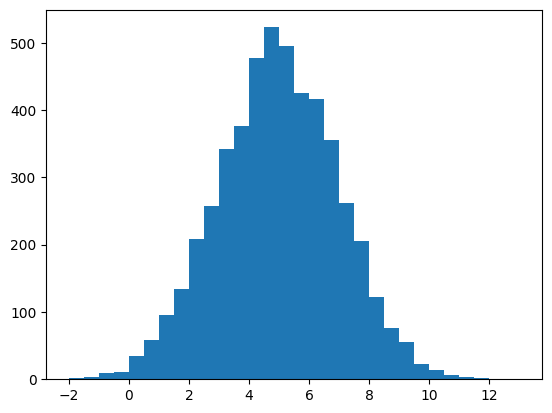

In [11]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)
# Print normals
print(normals)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins= np.arange(-2, 13.5, 0.5))
plt.show()

## Chapter 2

### Simple random sampling

In [5]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
1134   35        0.0  ...                      10                     1
1150   52        0.0  ...                       0                     0
531    33        0.0  ...                       1                     6
395    31        0.0  ...                       0                     1
392    29        0.0  ...                       1                     3
...   ...        ...  ...                     ...                   ...
361    27        0.0  ...                       0                     4
1180   36        0.0  ...                       6                     7
230    26        0.0  ...                       0                     0
211    29        0.0  ...                       0                     2
890    30        0.0  ...                       0                     7

[70 rows x 31 columns]


### Systematic sampling 

In [6]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      21        0.0  ...                       0                     0
21     19        0.0  ...                       0                     0
42     45        0.0  ...                       0                     0
63     23        0.0  ...                       0                     1
84     30        1.0  ...                       0                     0
...   ...        ...  ...                     ...                   ...
1365   48        0.0  ...                       0                     0
1386   48        0.0  ...                       4                     8
1407   50        0.0  ...                      13                     8
1428   50        0.0  ...                      14                     7
1449   52        0.0  ...                      11                     9

[70 rows x 31 columns]


### Shuffling the rows

if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling

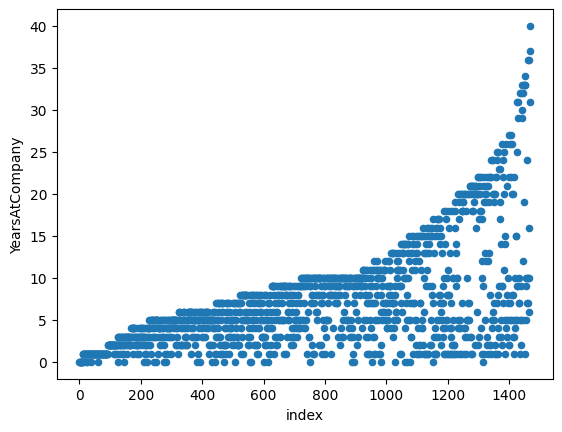

In [8]:
import matplotlib.pyplot as plt

# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x='index', y= 'YearsAtCompany', kind='scatter')
plt.show()

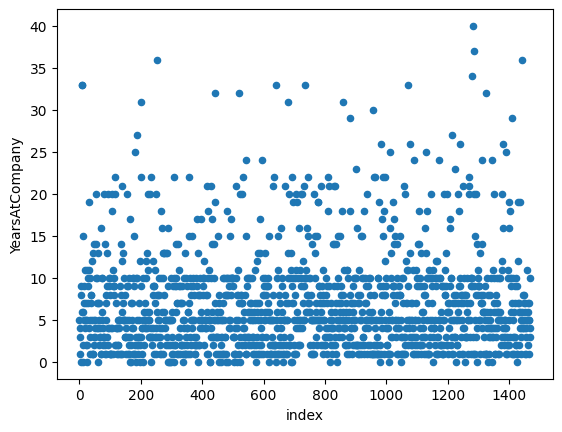

In [9]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

### Proportional stratified sampling

In [10]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
	.sample(frac=0.4, random_state=2022)

# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


### Equal counts stratified sampling

In [11]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize= True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


### Weighted sampling 

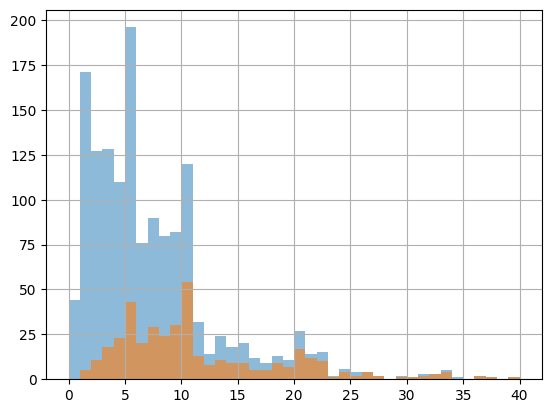

In [22]:
import numpy as np

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1), alpha= 0.5)

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1), alpha= 0.6)

plt.show()

### Cluster sampling 
The main benefit of cluster sampling over stratified sampling is that you can save time and money by not including every subgroup in your sample.

In [25]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole')\
.sample(n= 10, random_state=2022)

# Print the sample
print(attrition_clust)

      Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
233    34        0.0  ...                       1                     3
989    46        0.0  ...                       1                     4
1218   46        0.0  ...                       0                     8
1350   52        0.0  ...                       0                     2
1163   37        1.0  ...                       0                     0
1248   47        0.0  ...                       2                     7
773    42        0.0  ...                       5                     8
933    30        0.0  ...                       0                     2
1200   43        0.0  ...                       0                     1
642    45        0.0  ...                       0                     2
298    29        0.0  ...                       0                     0
186    37        0.0  ...                       0                     0
287    34        0.0  ...                       0               

### 3 kinds of sampling

In [26]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

In [ ]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction')\
.sample(frac=1/4, random_state=2022)

In [ ]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique,  k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep =attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction']\
.cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction')\
    .sample(n=len(attrition_pop)// 4, random_state= 2022)


### Comparig point estimates

In [33]:
# Calculate the mean of 'Attrition' column within each group
mean_attrition_pop =attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [34]:
# Calculate the mean of 'Attrition' column within each group
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [35]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.221239
Medium       0.102804
High         0.148148
Very_High    0.150838
Name: Attrition, dtype: float64


In [37]:
# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.142857
Medium       0.500000
High         0.055556
Very_High    0.200000
Name: Attrition, dtype: float64


## Chapter 3

### Relative errors

In [ ]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 =attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100* abs(mean_attrition_srs50 - mean_attrition_pop) / mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

In [ ]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100* abs(mean_attrition_srs100 - mean_attrition_pop) / mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

### Replicating samples

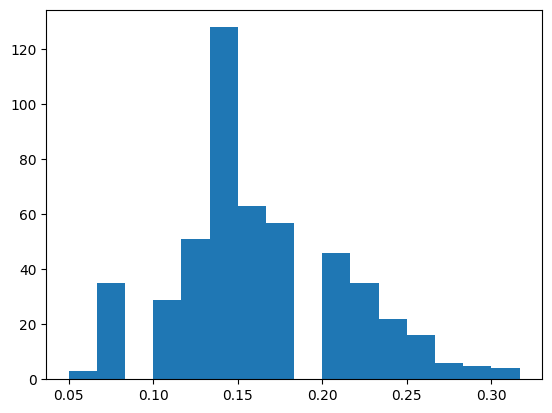

In [6]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

### Exact sampling distribution

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to expand a grid
def expand_grid(dictionary):
    return pd.DataFrame([row for row in itertools.product(*dictionary.values())], columns=dictionary.keys())

# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

NameError: name 'itertools' is not defined

### Aproximate sampling distribution

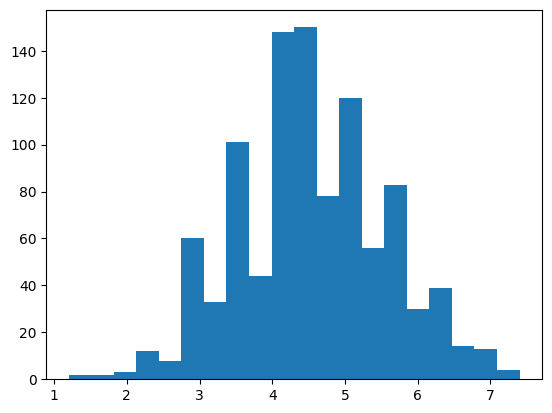

In [12]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000,bins=20)
plt.show()

## Chapter 4

### Generating a bootstrap distribution

In [10]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5892280000000001


In [11]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000)

[0.5823701000000001, 0.5907460999999999, 0.5949043999999999, 0.5940726999999999, 0.5865107, 0.5914543999999999, 0.5890847, 0.5931227, 0.5811731, 0.5939201000000001, 0.5918034, 0.6086687, 0.5906871, 0.5831775, 0.5802434, 0.5845678000000001, 0.5878825, 0.5863607, 0.5908954, 0.5873833999999999, 0.6045747, 0.5973294000000001, 0.5905887, 0.5859911, 0.5852907, 0.5813021, 0.5932854, 0.5872681, 0.5772108, 0.5846982000000001, 0.5841179999999999, 0.5781514, 0.5833461, 0.590557, 0.5862964, 0.5906507000000001, 0.590711, 0.5819661, 0.5968481, 0.5843147, 0.5949494, 0.5847477, 0.5834841000000001, 0.5874701, 0.5812274, 0.5938237, 0.593669, 0.5837258000000001, 0.590054, 0.5916473999999999, 0.5997657000000001, 0.5891823999999999, 0.5895221, 0.6000584, 0.5925921000000001, 0.5894211, 0.5850966999999999, 0.5884788000000001, 0.5975360000000001, 0.5844691, 0.5858664000000001, 0.5853758, 0.5844047, 0.5901114, 0.5978087000000001, 0.5948127, 0.5875374, 0.5934507000000001, 0.5790350999999999, 0.5903194, 0.591517

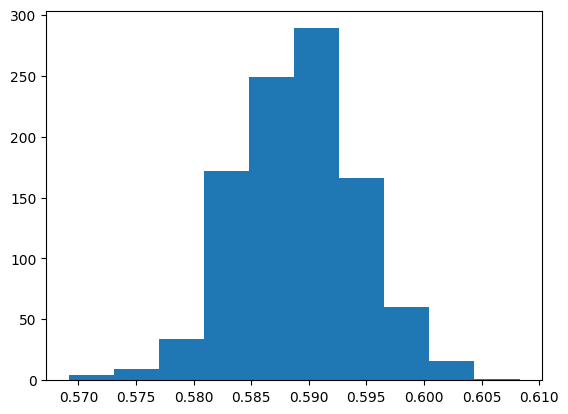

In [12]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

### Smapling distribution 

In [13]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_population.sample(n=500)['popularity'].mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)

[54.814, 54.692, 54.814, 55.15, 54.23, 54.98, 55.39, 55.032, 54.608, 54.972, 54.154, 55.844, 54.288, 54.274, 54.574, 55.338, 54.572, 54.64, 55.238, 55.446, 55.04, 55.06, 54.436, 55.074, 55.182, 54.93, 54.718, 53.89, 54.83, 55.268, 54.828, 55.254, 55.564, 54.998, 54.76, 54.86, 55.33, 55.522, 55.322, 55.572, 54.706, 55.818, 54.612, 55.1, 55.73, 54.778, 54.918, 54.598, 55.136, 55.638, 55.064, 54.812, 52.848, 55.292, 55.566, 54.338, 54.69, 54.47, 54.934, 54.772, 55.154, 56.11, 55.064, 55.28, 54.876, 55.452, 55.542, 54.47, 54.97, 54.7, 55.288, 55.198, 55.654, 55.208, 54.626, 54.786, 53.804, 54.368, 55.278, 55.788, 55.182, 55.616, 54.676, 55.27, 55.068, 54.93, 54.836, 54.564, 54.966, 54.712, 54.602, 54.764, 55.776, 55.702, 54.8, 54.6, 54.342, 54.668, 54.308, 54.364, 54.992, 53.734, 53.94, 54.282, 54.31, 55.058, 54.776, 54.986, 55.46, 53.802, 55.888, 54.616, 55.206, 54.948, 54.292, 55.298, 54.964, 54.676, 54.942, 55.29, 54.54, 54.89, 54.81, 55.634, 54.542, 55.08, 55.358, 54.548, 55.428, 53.78

### Bootstrap distribution

In [14]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample.sample(n=500, replace= True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[54.8, 55.21, 54.82, 54.858, 55.092, 55.464, 54.87, 54.436, 55.336, 54.256, 55.21, 55.084, 54.94, 54.822, 54.736, 53.796, 53.004, 54.968, 54.068, 55.226, 54.932, 54.618, 55.09, 55.176, 55.204, 54.836, 54.822, 55.004, 54.268, 54.624, 54.622, 53.994, 54.76, 54.776, 54.648, 55.268, 54.75, 54.056, 54.746, 54.55, 54.448, 54.046, 54.868, 54.114, 54.808, 54.742, 54.742, 53.584, 54.628, 53.716, 54.788, 54.862, 54.6, 54.214, 53.782, 55.018, 54.418, 55.116, 54.838, 54.628, 54.878, 53.818, 54.108, 54.556, 53.288, 54.212, 54.454, 55.408, 55.098, 55.282, 54.85, 54.634, 54.628, 54.068, 54.742, 54.764, 55.052, 54.192, 54.374, 55.292, 54.72, 53.722, 54.586, 53.15, 54.364, 54.692, 55.072, 54.322, 55.266, 54.746, 55.476, 54.81, 55.246, 54.428, 55.662, 54.148, 55.536, 53.742, 53.736, 55.168, 54.612, 55.648, 56.22, 55.186, 54.904, 55.074, 54.868, 54.31, 53.85, 55.346, 54.622, 55.022, 55.078, 54.494, 54.728, 55.404, 54.788, 55.056, 54.916, 54.73, 54.87, 54.804, 54.142, 54.284, 54.63, 55.402, 54.68, 54.924,

### Sampling and bootstraps means

In [15]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

### Compare sampling and bootstrap standard deviations

In [ ]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std(ddof=1)

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd =np.std(sampling_distribution, ddof=1) *np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof=1) *np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

### confidence intervals 

In [ ]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

In [ ]:
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))